# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Ekene Chukwurah</h2>

# Data

In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Import machine learning libraries
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

In [108]:
# Read csv
data_raw = pd.read_csv('winequality.csv')
data_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [76]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [77]:
data_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [78]:
data_raw.groupby(by="quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


# Exploratory Data Analysis

In [ ]:
# Our label Distribution (countplot)
fig, axs = plt.subplots(4,3, figsize=(22,16))
counter = 0
for i in range(4):
    for j in range(3):
        sns.barplot(x='quality', y=data_raw.columns.values[counter],data=data_raw, ax =axs[i][j])
        counter+=1
        if counter==(len(data_raw.columns.values)-1,):
            break

In [ ]:
# Example EDA (distplot)
fig, axs = plt.subplots(4,3, figsize=(22,16))
counter = 0
for i in range(4):
    for j in range(3):
        sns.distplot(data_raw[data_raw.columns.values[counter]], ax =axs[i][j])
        counter+=1
        if counter==(len(data_raw.columns.values)-1,):
            break

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [81]:
print('The number of duplicated values are: {}'.format(data_raw.duplicated().sum()))
data_raw.drop_duplicates(inplace = True)

The number of duplicated values are: 240


In [82]:
#Drop dependent variable from dataset
X = data_raw.drop(['quality'], axis = 1)
y = data_raw[['quality']]

In [83]:
#Scaling the data
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X_s

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [84]:
#Split into train, test set

X_train, X_test, y_train,y_test = train_test_split(X_s, y, test_size = 0.30, random_state = 102)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [86]:

clf = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lreg = LogisticRegression()

In [87]:
#fit models
rfc.fit(X_train, y_train.values.ravel())
clf.fit(X_train, y_train) 
lreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
#Predict
pred_clf = clf.predict(X_test)
pred_rfc = rfc.predict(X_test)
pred_lreg = lreg.predict(X_test)

In [89]:
print(f'Decision tree classifier accuracy: {accuracy_score(y_test, pred_clf)}\n')
print(f'Random Forest accuracy:  {accuracy_score(y_test, pred_rfc)}\n')
print(f'Logistic regression accuracy: {accuracy_score(y_test, pred_lreg)}\n')

Decision tree classifier accuracy: 0.4632352941176471

Random Forest accuracy:  0.5808823529411765

Logistic regression accuracy: 0.6029411764705882



In [90]:
print('Decision tree classifier precision: {}\n'.format(precision_score(y_test, pred_clf, pos_label='positive', average='weighted')))
print('Random Forest classifier precision: {}\n'.format(precision_score(y_test, pred_rfc, pos_label='positive', average='weighted')))
print('Logistic regression classifier precision: {}\n'.format(precision_score(y_test, pred_lreg, pos_label='positive', average='weighted')))

Decision tree classifier precision: 0.46506456698969434

Random Forest classifier precision: 0.5478115934430813

Logistic regression classifier precision: 0.5926417017213023



C:\Users\Fidel_Ekene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Fidel_Ekene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
print('Decision tree classifier recall: {}\n'.format(recall_score(y_test, pred_clf, pos_label='positive', average='weighted')))
print('Random Forest classifier recall: {}\n'.format(recall_score(y_test, pred_rfc, pos_label='positive', average='weighted')))
print('Logistic regression classifier recall: {}\n'.format(recall_score(y_test, pred_lreg, pos_label='positive', average='weighted')))

Decision tree classifier recall: 0.46323529411764713

Random Forest classifier recall: 0.5808823529411765

Logistic regression classifier recall: 0.6029411764705882



In [92]:
print('Decision tree classifier f1 score: {}\n'.format(f1_score(y_test, pred_clf, pos_label='positive', average='weighted')))
print('Random Forest classifier f1 score: {}\n'.format(f1_score(y_test, pred_rfc, pos_label='positive', average='weighted')))
print('Logistic regression classifier f1 score: {}\n'.format(f1_score(y_test, pred_lreg, pos_label='positive', average='weighted')))

Decision tree classifier f1 score: 0.46390246791729156

Random Forest classifier f1 score: 0.5574483675443712

Logistic regression classifier f1 score: 0.5778257932729477



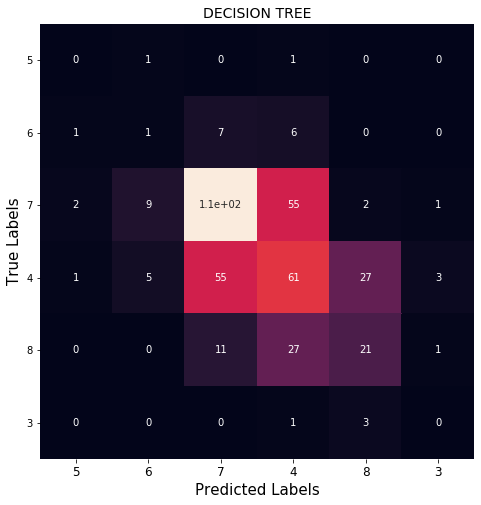

In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_clf)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_title('DECISION TREE', fontsize = 14)
ax.xaxis.set_ticklabels(data_raw['quality'].unique().tolist(), fontsize = 12)
ax.yaxis.set_ticklabels(data_raw['quality'].unique().tolist(), rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

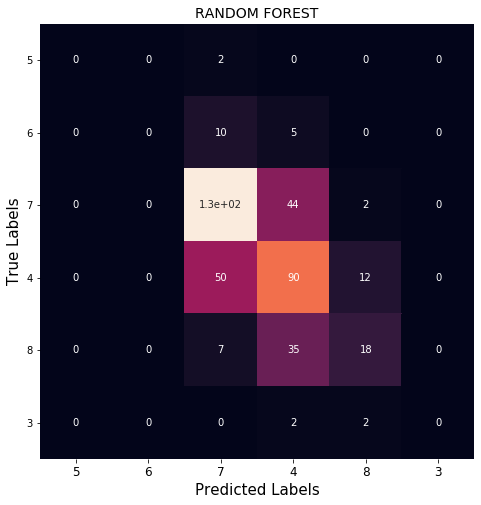

In [94]:
cm = confusion_matrix(y_test, pred_rfc)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_title('RANDOM FOREST', fontsize = 14)
ax.xaxis.set_ticklabels(data_raw['quality'].unique().tolist(), fontsize = 12)
ax.yaxis.set_ticklabels(data_raw['quality'].unique().tolist(), rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

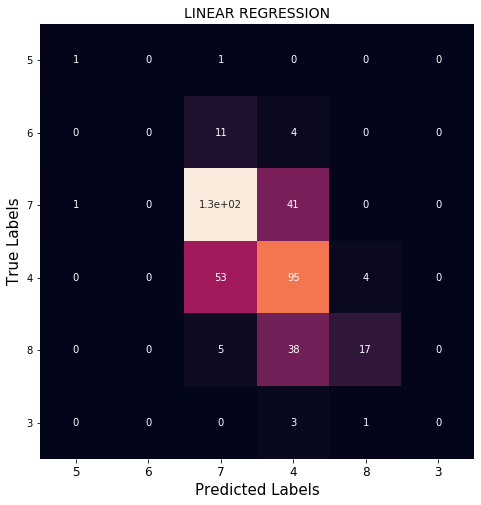

In [95]:
cm = confusion_matrix(y_test, pred_lreg)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_title('LINEAR REGRESSION', fontsize = 14)
ax.xaxis.set_ticklabels(data_raw['quality'].unique().tolist(), fontsize = 12)
ax.yaxis.set_ticklabels(data_raw['quality'].unique().tolist(), rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

In [109]:
# I will use the Random forest classifier since it has the highest accuracy
from sklearn.preprocessing import LabelEncoder
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data_raw['quality'] = pd.cut(data_raw['quality'], bins = bins, labels = group_names)
data_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [110]:
label_quality = LabelEncoder()

In [111]:
data_raw['quality'] = label_quality.fit_transform(data_raw['quality'])

In [112]:
data_raw['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

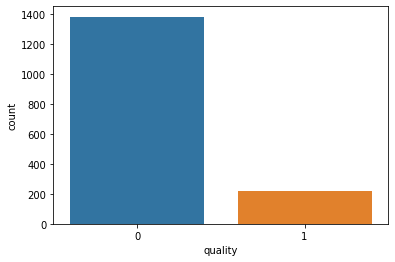

In [113]:
sns.countplot(data_raw['quality'])

In [114]:
# New X and y
X_new = data_raw.drop('quality', axis = 1)
y_new = data_raw['quality']

In [115]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.3, random_state = 102)

In [116]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [118]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred2_rfc = rfc.predict(X_test)
print(f'Random Forest accuracy:  {accuracy_score(y_test, pred2_rfc)}\n')

Random Forest accuracy:  0.9083333333333333



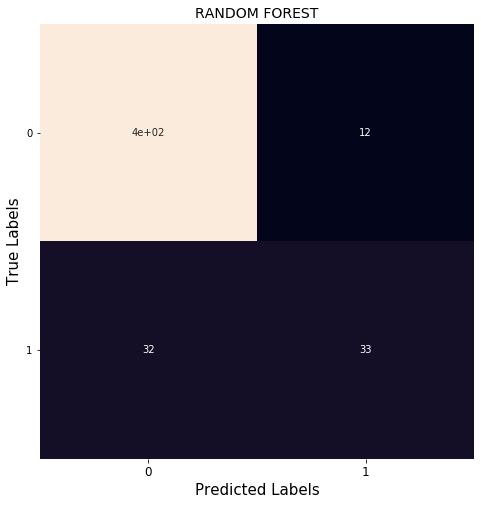

[[402  13]
 [ 31  34]]


In [120]:
cm = confusion_matrix(y_test, pred2_rfc)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_title('RANDOM FOREST', fontsize = 14)
ax.xaxis.set_ticklabels(data_raw['quality'].unique().tolist(), fontsize = 12)
ax.yaxis.set_ticklabels(data_raw['quality'].unique().tolist(), rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()
